In [1]:
from pathlib import Path
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
import numpy as np

In [2]:
xray_stat_dfs, rmsd_stat_dfs = list(), list()

target = "3ca7"
job_name = "152_native_1_cif"

xray_dir = Path(Path.home(), "Documents/xray")
log_stats_dir = Path(xray_dir, "sample_bench/data", target)

for i in range(10):
    xray_stat_df = pd.read_csv(Path(log_stats_dir, job_name, "xray_volume_bench_{}.csv".format(i)), index_col=0)
    rmsd_stat_df = pd.read_csv(Path(log_stats_dir, job_name, "rmsd_volume_bench_{}.csv".format(i)), index_col=0)

    xray_stat_dfs.append(xray_stat_df)
    rmsd_stat_dfs.append(rmsd_stat_df)

In [3]:
field = "xray_0"
# field = "xray_0+xray_1"

In [4]:
all_mins, all_maxes = list(), list()
for xray_stat_df in xray_stat_dfs:
    all_mins.append(xray_stat_df["{}_mean".format(field)].min())
    all_maxes.append(xray_stat_df["{}_mean".format(field)].max())
print(np.min(all_mins), np.max(all_maxes))

all_mins, all_maxes = list(), list()
for xray_stat_df in xray_stat_dfs:
    all_mins.append(xray_stat_df["rmsd_avg_0_mean"].min())
    all_maxes.append(xray_stat_df["rmsd_avg_0_mean"].max())
print(np.min(all_mins), np.max(all_maxes))

all_mins, all_maxes = list(), list()
for rmsd_stat_df in rmsd_stat_dfs:
    all_mins.append(rmsd_stat_df["rmsd_avg_0_mean"].min())
    all_maxes.append(rmsd_stat_df["rmsd_avg_0_mean"].max())
print(np.min(all_mins), np.max(all_maxes))


2.8746156435167576 5.1391687162476
0.0558503575601368 1.1059862555136848
0.0464123299373061 0.7742579601764873


In [5]:
all_score_df = pd.concat(xray_stat_dfs)
all_rmsd_df = pd.concat(rmsd_stat_dfs)

score_min = all_score_df["{}_mean".format(field)].min()
score_max = all_score_df["{}_mean".format(field)].max()

score_rmsd_min = all_score_df["rmsd_avg_0_mean"].min()
score_rmsd_max = all_score_df["rmsd_avg_0_mean"].max()

rmsd_min = all_rmsd_df["rmsd_avg_0_mean"].min()
rmsd_max = all_rmsd_df["rmsd_avg_0_mean"].max()


In [18]:
xray_stat_dfs[0]

,n,xray_0_mean,xray_0_std,rmsd_avg_0_mean,rmsd_avg_0_std
1,NaN,4.104143,3.892918e-02,0.198531,0.066304
2,NaN,4.081720,2.391607e-02,0.204166,0.043290
3,NaN,4.074060,1.826287e-02,0.209659,0.034493
4,NaN,4.069298,1.548257e-02,0.211661,0.029620
5,NaN,4.065947,1.464124e-02,0.212209,0.026974
...,...,...,...,...,...
996,NaN,4.023334,1.776357e-15,0.240358,0.000000
997,NaN,4.023334,1.776357e-15,0.240358,0.000000
998,NaN,4.023334,1.776357e-15,0.240358,0.000000
999,NaN,4.023334,1.776357e-15,0.240358,0.000000


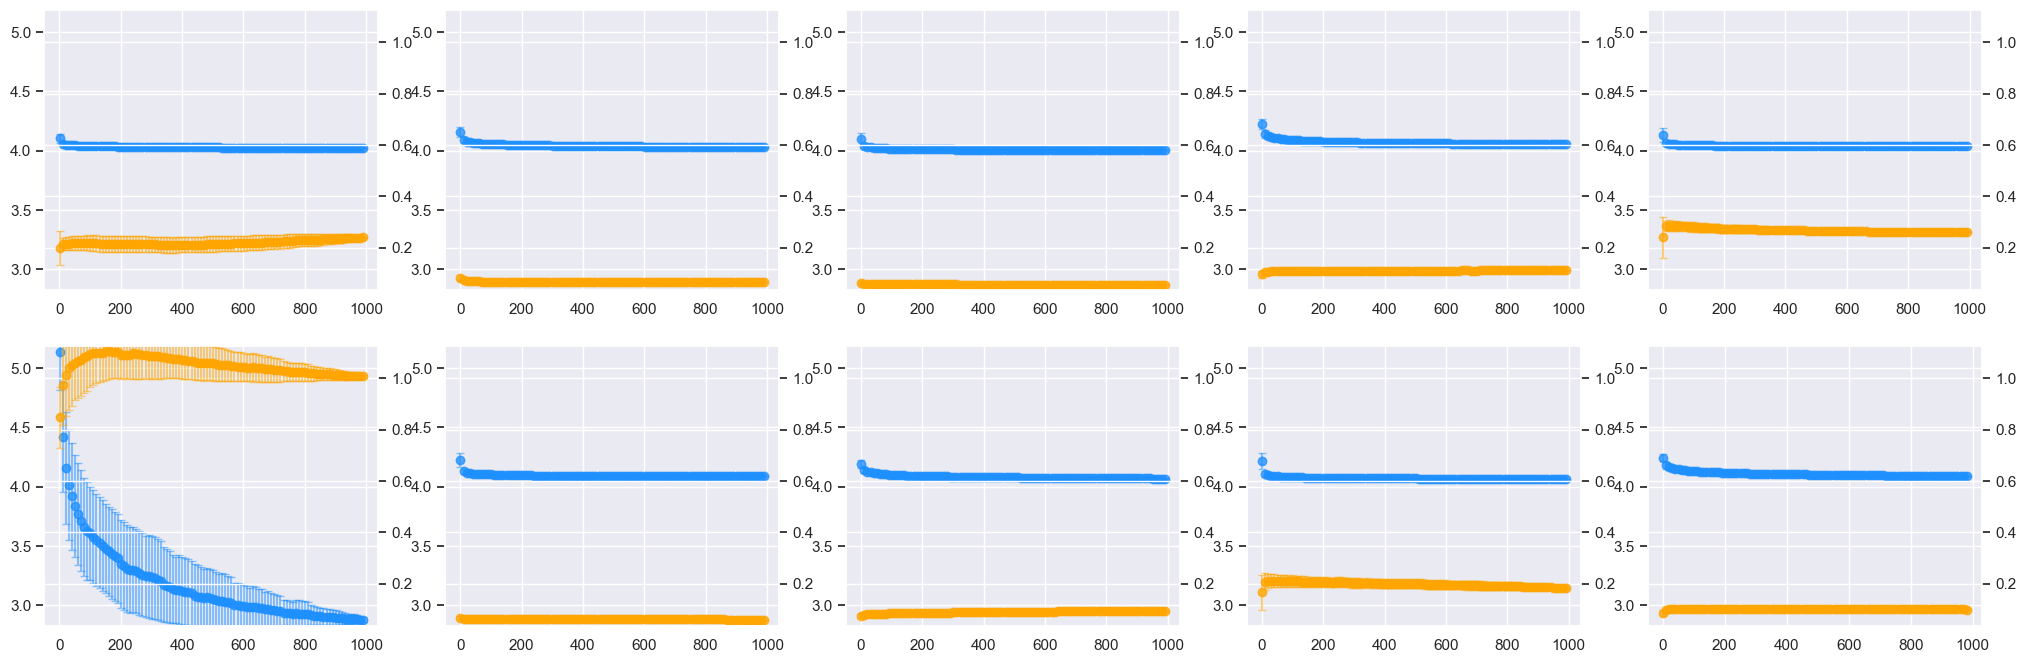

In [19]:
fig, axs = plt.subplots(2, 5, figsize=(25,8))

colors = list()
colors.append(mcolors.CSS4_COLORS["dodgerblue"])
colors.append(mcolors.CSS4_COLORS["orange"])
colors.append(mcolors.CSS4_COLORS["orangered"])

alpha = .5
space = 10

x = xray_stat_dfs[0].index[::space]

for i in range(10):
    y1 = xray_stat_dfs[i]["{}_mean".format(field)][::space]
    std1 = xray_stat_dfs[i]["{}_std".format(field)][::space]

    y2 = xray_stat_dfs[i]["rmsd_avg_0_mean"][::space]
    std2 = xray_stat_dfs[i]["rmsd_avg_0_std"][::space]

    ax1 = axs[i//5][i%5]
    ax1.set_ylim(score_min-.05, score_max+.05)
    ax1.scatter(x[:len(y1)], y1, c=colors[0], alpha=alpha)
    ax1.errorbar(x[:len(y1)], y1, std1, linestyle='None', marker='o', capsize=3, c=colors[0], alpha=alpha)

    ax2 = ax1.twinx()
    ax2.set_ylim(score_rmsd_min-.02, score_rmsd_max+.02)
    ax2.scatter(x[:len(y2)], y2, c=colors[1], alpha=alpha)
    ax2.errorbar(x[:len(y2)], y2, std2, linestyle='None', marker='o', capsize=3, c=colors[1], alpha=alpha)

    # y3 = rmsd_stat_dfs[i]["rmsd_avg_0_mean"][::space]
    # std3 = rmsd_stat_dfs[i]["rmsd_avg_0_std"][::space]

    # ax3 = axs[i//5][i%5]
    # ax3.set_ylim(rmsd_min-.01,rmsd_max+.01)
    # ax3.scatter(x[:len(y3)], y3, c=colors[1], alpha=alpha)
    # ax3.errorbar(x[:len(y3)], y3, std3, linestyle='None', marker='o', capsize=3, c=colors[1], alpha=alpha)

plt.savefig(Path(Path.home(), "Desktop/sample_volume_benchmark.png"))


